scikit-learn을 이용한 다양한 분류 문제 
======

1. 손글씨 분류 (load_digits)
2. 와인 분류 (load_wine)
3. 유방암 여부 진단 (load_breast_cancer)

Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 모델을 이용하여 학습하고 예측해 본다. 

# 1. 손글씨 분류


scikit-learn의 예제 데이터 Toy Dataset 중 load_digits (손글씨 이미지 데이터)를 사용하여      
손글씨 이미지를 제대로 0~9까지 열 가지 카테고리로 분류해 보는 실습

- load_digits 데이터는 총 1797개 
- feature는 64개의 픽셀값 (8x8 이미지)
- label은 0~9 사이의 숫자
    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits   

## 1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2) 데이터 준비

In [2]:
digits = load_digits()

# digits에는 어떤 정보들이 담겼을지, keys() 메서드로 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## 3) 데이터 이해하기

### Feature Data 지정하기

In [3]:
digits_data = digits.data

print(digits_data.shape)

(1797, 64)


### 데이터 확인

In [4]:
digits_data[5]

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

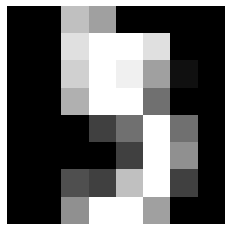

In [5]:
# 이미지로 보기 위해 matplotlib 라이브러리 추가
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(digits.data[5].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

### Label Data 지정하기

In [6]:
digits_label = digits.target

print(digits_label.shape)

(1797,)


### Target Names 출력해 보기

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 데이터 Describe 해 보기

In [8]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

## 4) train, test 데이터 분리

In [9]:
import pandas as pd

digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
# label 추가
digits_df["label"] = digits_label

digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, 
                                                    test_size=0.2, random_state=77)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  1437 , X_test 개수:  360
y_train 개수:  1437 , y_test 개수:  360


## 5) 다양한 모델로 학습시켜보기

### Decision Tree 사용해 보기

In [12]:
# Decision Tree 모델 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=777)
print(decision_tree._estimator_type)

classifier


In [13]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=777)

In [14]:
# 예측과 정확도 확인 
from sklearn.metrics import accuracy_score
y_pred_dt = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
accuracy 

0.8611111111111112

### Random Forest 사용해 보기

In [15]:
# Random Forest 모델 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=777)

# 학습 
random_forest.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_rf = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
accuracy 

0.9694444444444444

### SVM 사용해 보기

In [16]:
# SVM 모델 
from sklearn import svm
svm_model = svm.SVC()

# 학습
svm_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.9944444444444445

### SGD Classifier 사용해 보기

In [17]:
# SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

# 학습 
sgd_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_sgd = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sgd)
accuracy

0.9472222222222222

### Logistic Regression 사용해 보기

In [18]:
# Logistic Regression 모델 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

# 학습
logistic_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_lr = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
accuracy 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9611111111111111

## 6) 모델을 평가해 보기

In [19]:
#  Precision, Recall, F1 score 
# sklearn.metrics의 classification_report를 활용하여 각 지표를 한 번에 확인

# Decision Tree 모델
print("[ Decision Tree ]")
print(classification_report(y_test, y_pred_dt)) 

[ Decision Tree ]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.84      0.90      0.87        48
           2       0.85      0.85      0.85        34
           3       0.85      0.83      0.84        35
           4       0.82      0.84      0.83        43
           5       0.94      0.94      0.94        32
           6       1.00      0.89      0.94        38
           7       0.83      0.92      0.88        38
           8       0.78      0.67      0.72        27
           9       0.76      0.76      0.76        34

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



In [20]:
# Random Forest 모델
print("[ Random Forest ]")
print(classification_report(y_test, y_pred_rf))

[ Random Forest ]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      0.98      0.99        48
           2       1.00      1.00      1.00        34
           3       0.92      0.97      0.94        35
           4       0.96      1.00      0.98        43
           5       0.97      0.97      0.97        32
           6       1.00      0.97      0.99        38
           7       0.95      0.97      0.96        38
           8       0.96      0.89      0.92        27
           9       0.94      0.94      0.94        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [21]:
# SVM 모델
print("[ SVM ]")
print(classification_report(y_test, y_pred_svm))

[ SVM ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        35
           4       1.00      0.98      0.99        43
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        38
           8       0.96      0.96      0.96        27
           9       0.97      1.00      0.99        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [22]:
# SGD Classifier 모델
print("[ SGD Classifier ]")
print(classification_report(y_test, y_pred_sgd)) 

[ SGD Classifier ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.96      0.96      0.96        48
           2       1.00      1.00      1.00        34
           3       0.97      0.91      0.94        35
           4       0.95      0.98      0.97        43
           5       1.00      0.91      0.95        32
           6       0.93      0.97      0.95        38
           7       0.88      0.97      0.93        38
           8       0.91      0.78      0.84        27
           9       0.89      0.94      0.91        34

    accuracy                           0.95       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.95      0.95       360



In [23]:
# Logistic Regression 모델
print("[ Logistic Regression ]")
print(classification_report(y_test, y_pred_lr))

[ Logistic Regression ]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.92      0.92      0.92        48
           2       1.00      0.94      0.97        34
           3       0.97      0.97      0.97        35
           4       0.95      0.93      0.94        43
           5       0.97      0.97      0.97        32
           6       1.00      0.97      0.99        38
           7       0.95      0.97      0.96        38
           8       0.90      1.00      0.95        27
           9       0.97      1.00      0.99        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



손글씨 분류 문제는 데이터를 올바르게 판단하는 게 중요한 문제이기 때문에 평가 지표 중 accuracy가 중요합니다.

    Accuracy , 정확도 : (TP+TN) / (TP+TN+FP+FN)
    - 전체 데이터 중 올바르게 판단한 데이터 개수의 비율
    - Accuracy 값은 클수록 좋음

각 모델의 Accuracy는 
- Decision Tree : 0.86 
- Random Forest : 0.97 
- SVM : 0.99
- SGD Classifier : 0.95
- Logistic Regression : 0.96    

이므로 이 손글씨 분류 문제에는 SVM 모델이 가장 잘 예측한 것으로 볼 수 있습니다. 

# 2. 와인 분류 

scikit-learn의 예제 데이터 Toy Dataset 중 load_wine (와인 데이터)를 사용하여         
와인의 특징들으로 와인의 종류를 3가지로 분류해 보는 실습

- load_digits 데이터는 총 178개 
- feature는 총 13개, Alcohol, Malic acid, Color intensity 등 와인의 특성값
- label은 class 0, 1, 2의 세 가지 카테고리
    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

## 1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2) 데이터 준비

In [2]:
wine = load_wine()

# wine에는 어떤 정보들이 담겼을지, keys() 메서드로 확인
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## 3) 데이터 이해하기

### Feature Data 지정하기

In [3]:
wine_data = wine.data

print(wine_data.shape)

(178, 13)


### 데이터 확인

In [4]:
wine_data[10]

array([1.41e+01, 2.16e+00, 2.30e+00, 1.80e+01, 1.05e+02, 2.95e+00,
       3.32e+00, 2.20e-01, 2.38e+00, 5.75e+00, 1.25e+00, 3.17e+00,
       1.51e+03])

### Label Data 지정하기

In [5]:
wine_label = wine.target

print(wine_label.shape)

(178,)


### Target Names 출력해 보기

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 데이터 Describe 해 보기

In [7]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

## 4) train, test 데이터 분리

In [8]:
import pandas as pd

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [9]:
# label 추가
wine_df["label"] = wine_label

wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, 
                                                    test_size=0.2, random_state=11)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  142 , X_test 개수:  36
y_train 개수:  142 , y_test 개수:  36


## 5) 다양한 모델로 학습시켜보기

### Decision Tree 사용해 보기

In [11]:
# Decision Tree 모델 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=111)
print(decision_tree._estimator_type)

classifier


In [12]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=111)

In [13]:
# 예측과 정확도 확인 
from sklearn.metrics import accuracy_score
y_pred_dt = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.9722222222222222

### Random Forest 사용해 보기

In [14]:
# Random Forest 모델 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=111)

# 학습 
random_forest.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_rf = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.9722222222222222

### SVM 사용해 보기

In [15]:
# SVM 모델 
from sklearn import svm
svm_model = svm.SVC()

# 학습
svm_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.7777777777777778

### SGD Classifier 사용해 보기

In [16]:
# SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

# 학습 
sgd_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_sgd = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sgd)
accuracy

0.7222222222222222

### Logistic Regression 사용해 보기

In [17]:
# Logistic Regression 모델 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()#solver='liblinear')

# 학습
logistic_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_lr = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
accuracy

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9722222222222222

## 6) 모델을 평가해 보기

In [18]:
#  Precision, Recall, F1 score 
# sklearn.metrics의 classification_report를 활용하여 각 지표를 한 번에 확인

# Decision Tree 모델
print("[ Decision Tree ]")
print(classification_report(y_test, y_pred_dt))

[ Decision Tree ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [19]:
# Random Forest 모델
print("[ Random Forest ]")
print(classification_report(y_test, y_pred_rf))

[ Random Forest ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [20]:
# SVM 모델
print("[ SVM ]")
print(classification_report(y_test, y_pred_svm))

[ SVM ]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.75      0.80      0.77        15
           2       0.40      0.29      0.33         7

    accuracy                           0.78        36
   macro avg       0.69      0.70      0.69        36
weighted avg       0.75      0.78      0.76        36



In [21]:
# SGD Classifier 모델
print("[ SGD Classifier ]")
print(classification_report(y_test, y_pred_sgd))

[ SGD Classifier ]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.60      1.00      0.75        15
           2       0.00      0.00      0.00         7

    accuracy                           0.72        36
   macro avg       0.53      0.60      0.54        36
weighted avg       0.64      0.72      0.65        36



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Logistic Regression 모델
print("[ Logistic Regression ]")
print(classification_report(y_test, y_pred_lr))

[ Logistic Regression ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



와인 분류 문제는 데이터를 올바르게 판단하는 게 중요한 문제이기 때문에 평가 지표 중 accuracy가 중요합니다.

    Accuracy , 정확도 : (TP+TN) / (TP+TN+FP+FN)
    - 전체 데이터 중 올바르게 판단한 데이터 개수의 비율
    - Accuracy 값은 클수록 좋음

각 모델의 Accuracy는
- Decision Tree : 0.97
- Random Forest : 0.97
- SVM : 0.78
- SGD Classifier : 0.72
- Logistic Regression : 0.97

이므로 이 와인 분류 문제에서는 Decision Tree, Random Forest, Logistic Regression 모델이 잘 예측한 것으로 볼 수 있습니다.

# 3. 유방암 여부 진단 


scikit-learn의 예제 데이터 Toy Dataset 중 load_breast_cancer (유방암 데이터)를 사용하여    
여러 건강 지표에 따라서 환자의 유방암 여부를 분류해 보는 실습   

- load_breast_cancer 데이터는 총 569개 
- feature는 총 30개 (여러 사람의 건강 지표에 대한 데이터)
- label은 유방암의 여부가 True, False
    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

## 1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2) 데이터 준비

In [2]:
breast_cancer = load_breast_cancer()

# breast_cancer에는 어떤 정보들이 담겼을지, keys() 메서드로 확인
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 3) 데이터 이해하기

### Feature Data 지정하기

In [3]:
breast_cancer_data = breast_cancer.data

print(breast_cancer_data.shape)

(569, 30)


### 데이터 확인

In [4]:
breast_cancer_data[10]

array([1.602e+01, 2.324e+01, 1.027e+02, 7.978e+02, 8.206e-02, 6.669e-02,
       3.299e-02, 3.323e-02, 1.528e-01, 5.697e-02, 3.795e-01, 1.187e+00,
       2.466e+00, 4.051e+01, 4.029e-03, 9.269e-03, 1.101e-02, 7.591e-03,
       1.460e-02, 3.042e-03, 1.919e+01, 3.388e+01, 1.238e+02, 1.150e+03,
       1.181e-01, 1.551e-01, 1.459e-01, 9.975e-02, 2.948e-01, 8.452e-02])

### Label Data 지정하기

In [5]:
breast_cancer_label = breast_cancer.target

print(breast_cancer_label.shape)

(569,)


### Target Names 출력해 보기

In [6]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### 데이터 Describe 해 보기

In [7]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

## 4) train, test 데이터 분리

In [8]:
import pandas as pd

breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [9]:
# label 추가
breast_cancer_df["label"] = breast_cancer_label

breast_cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_label, 
                                                    test_size=0.2, random_state=20)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  455 , X_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


## 5) 다양한 모델로 학습시켜보기

### Decision Tree 사용해 보기

In [11]:
# Decision Tree 모델 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=200)
print(decision_tree._estimator_type)

classifier


In [12]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=200)

In [13]:
# 예측과 재현율 확인 
from sklearn.metrics import recall_score
y_pred_dt = decision_tree.predict(X_test)

recall = recall_score(y_test, y_pred_dt)
recall

0.9696969696969697

### Random Forest 사용해 보기

In [14]:
# Random Forest 모델 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=200)

# 학습 
random_forest.fit(X_train, y_train)

# 예측과 재현율 확인 
y_pred_rf = random_forest.predict(X_test)

recall = recall_score(y_test, y_pred_rf)
recall

1.0

### SVM 사용해 보기

In [15]:
# SVM 모델 
from sklearn import svm
svm_model = svm.SVC()

# 학습
svm_model.fit(X_train, y_train)

# 예측과 재현율 확인 
y_pred_svm = svm_model.predict(X_test)

recall = recall_score(y_test, y_pred_svm)
recall

1.0

### SGD Classifier 사용해 보기

In [16]:
# SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

# 학습 
sgd_model.fit(X_train, y_train)

# 예측과 재현율 확인 
y_pred_sgd = sgd_model.predict(X_test)

recall = recall_score(y_test, y_pred_sgd)
recall

0.4696969696969697

### Logistic Regression 사용해 보기

In [17]:
# Logistic Regression 모델 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()#solver='liblinear')

# 학습
logistic_model.fit(X_train, y_train)

# 예측과 재현율 확인 
y_pred_lr = logistic_model.predict(X_test)

recall = recall_score(y_test, y_pred_lr)
recall

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9545454545454546

## 6) 모델을 평가해 보기

In [18]:
#  Precision, Recall, F1 score 
# sklearn.metrics의 classification_report를 활용하여 각 지표를 한 번에 확인

# Decision Tree 모델
print("[ Decision Tree ]")
print(classification_report(y_test, y_pred_dt))

[ Decision Tree ]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [19]:
# Random Forest 모델
print("[ Random Forest ]")
print(classification_report(y_test, y_pred_rf))

[ Random Forest ]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [20]:
# SVM 모델
print("[ SVM ]")
print(classification_report(y_test, y_pred_svm))

[ SVM ]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        48
           1       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



In [21]:
# SGD Classifier 모델
print("[ SGD Classifier ]")
print(classification_report(y_test, y_pred_sgd))

[ SGD Classifier ]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        48
           1       1.00      0.47      0.64        66

    accuracy                           0.69       114
   macro avg       0.79      0.73      0.69       114
weighted avg       0.82      0.69      0.68       114



In [22]:
# Logistic Regression 모델
print("[ Logistic Regression ]")
print(classification_report(y_test, y_pred_lr))

[ Logistic Regression ]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.93      0.95      0.94        66

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



유방암 여부 분류 문제는 양성을 음성으로 판단하면 안 되기 때문에 평가지표 중 Recall이 중요합니다.    
    
    Recall, 재현율 : TP / (FN+TP)
    - Recall 값은 클수록 좋음    
    - TP(True Positive)는 맞게 판단한 양성이므로, 이 값은 높을수록 좋음
    - 분모에 있는 FN(False Negative)값이 낮아야, 양성인데 음성으로 판단하는 경우가 적어야 좋음
    
각 모델의 Recall은 
- Decision Tree : 0.94
- Random Forest : 0.98 
- SVM : 0.92
- SGD Classifier : 0.73
- Logistic Regression : 0.93

이므로 이 손글씨 분류 문제에는 Random Forest 모델이 가장 잘 예측한 것으로 볼 수 있습니다. 


# 회고

- 3가지 데이터셋의 구성이 합리적으로 진행되었는가?    
    train_test_split() 함수에서 random_state를 사용하여 데이터셋 구성을 하였습니다. 
    
- 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?    
    Logistic Regression, SGD Classifier 모델을 사용할 때 warrning이 있긴 하였지만 학습과 예측을 잘 되었음을 확인하였습니다. 
    
- 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?    
    적절히 선택되었다고 생각합니다.     
    하지만 마지막 recall 값을 확인하는 것이 헷갈려, sklearn.metrics의 recall_score()과 classification_report()을 좀 더 공부할 것입니다. 